#   Importing All librarys:


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [4]:
%%time
df = pd.read_csv(r"merged_dataset.csv")

CPU times: user 20 ms, sys: 11.2 ms, total: 31.2 ms
Wall time: 40.7 ms


In [5]:
df.shape

(6561, 5)

In [6]:
df.describe()

,score,thumbsUpCount
count,6561.000000,6561.000000
mean,3.262460,1.872733
std,1.903705,6.874382
min,1.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,163.000000


In [7]:
df.head(5)

,userName,content,score,at,thumbsUpCount
0,Santosh Tamhanekar,Nice,4,2023-06-16 16:07:20,0
1,Rizwan saifee,Best app for investment and to get easy returns,5,2023-06-16 11:24:23,0
2,Rahul Sawant,Application process with very smooth,5,2023-06-16 09:35:16,0
3,Nitish Kumar,Highly recommended. secure and convenient plat...,5,2023-06-15 08:56:49,0
4,Ajmeri Khan,Great platform for investment with decent retu...,5,2023-06-14 15:28:44,0


# Labeling the dataset:

In [8]:
# Mapping rating data to Binary label 1(+ve) if rating > 3, 0(-ve) if rating <= 2, and 2(neutral) if == 3
df['Label'] = df['score'].apply(lambda x: 1 if x > 3 else (0 if x < 4 else 2))

# Removing rows with label '2' (neutral)
df = df[df['Label'] != 2]

# Extracting relevant data for analysis
data = df[['content', 'Label']]

# Display the count of different labels
print(data['Label'].value_counts())


1    3661
0    2900
Name: Label, dtype: int64


In [9]:
df.head(4)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,Nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,Best app for investment and to get easy returns,5,2023-06-16 11:24:23,0,1
2,Rahul Sawant,Application process with very smooth,5,2023-06-16 09:35:16,0,1
3,Nitish Kumar,Highly recommended. secure and convenient plat...,5,2023-06-15 08:56:49,0,1


# Removing Stopwords:

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


False

In [14]:
# customize stopword as per data
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
stop_words = stopwords.words('english')
new_stopwords = ["one","would","shall","could","might"
                "to","the", "i"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/sanjayram/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# Data Cleaning

In [ ]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)


In [ ]:
# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

In [ ]:
#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [ ]:
# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

In [ ]:
#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content



In [ ]:
%%time
##Data cleaning
df['content'] = df['content'].apply(data_cleaning)
df['content'].head(5)

CPU times: user 354 ms, sys: 1.05 ms, total: 355 ms
Wall time: 447 ms


0                                                 nice
1                 best app investment get easy returns
2                           application process smooth
3    highly recommended secure convenient platform ...
4             great platform investment decent returns
Name: content, dtype: object

# Data Overview

In [ ]:
df.head(2)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1


In [ ]:
df.describe()

,score,thumbsUpCount,Label
count,6561.000000,6561.000000,6561.000000
mean,3.262460,1.872733,0.557994
std,1.903705,6.874382,0.496663
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,5.000000,0.000000,1.000000
75%,5.000000,1.000000,1.000000
max,5.000000,163.000000,1.000000


In [ ]:
##checking for missing value
df.isna().sum()

userName         0
content          0
score            0
at               0
thumbsUpCount    0
Label            0
dtype: int64

In [ ]:
df['content'].describe()

count     6561
unique    5785
top       good
freq       193
Name: content, dtype: object

In [ ]:
df['score'].describe()

count    6561.000000
mean        3.262460
std         1.903705
min         1.000000
25%         1.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: score, dtype: float64

In [ ]:
print('Unique reviews:%s' % df.content.nunique())
print('No of ratings:%s' % df.score.count())


Unique reviews:5785
No of ratings:6561


In [ ]:
df.head(4)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1
3,Nitish Kumar,highly recommended secure convenient platform ...,5,2023-06-15 08:56:49,0,1


# Exploratory Data Analysis¶

5    3366
1    2581
4     295
3     176
2     143
Name: score, dtype: int64


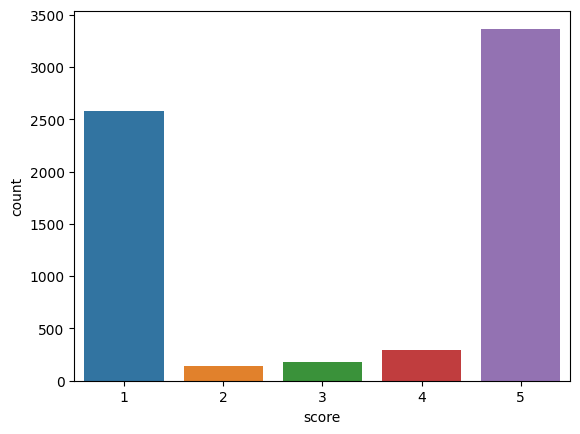

In [ ]:
#checking for Class Inbalance
sns.countplot(x = df['score'])
print(df['score'].value_counts()) ## score == Ratings,##content = Reviews


# Word Analysis

## sentiment extraction from app reviews, LDA and VADER techniques

# tokinizing the reviews by their frequency

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Most Common Words:
app: 3614 times
not: 2281 times
loan: 1669 times
good: 1287 times
money: 911 times
application: 831 times
investment: 668 times
invest: 632 times
get: 494 times
time: 483 times


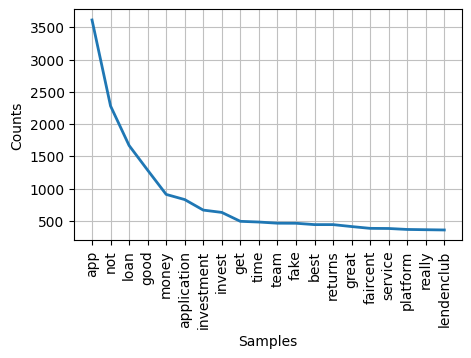

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


# Assuming the reviews are in a column named 'reviews'
reviews = df['content'].tolist()

# Preprocessing function (similar to the previous example)
def preprocess_review(review):
    review = re.sub(r"http\S+", "", review)
    review = re.sub(r"@\w+", "", review)
    review = re.sub(r"[^a-zA-Z\s]", "", review)
    review = review.lower()
    return review

# Apply preprocessing to each review
cleaned_reviews = [preprocess_review(review) for review in reviews]

# Tokenization using NLTK
tokenized_reviews = [nltk.word_tokenize(review) for review in cleaned_reviews]

# Flatten the list of tokenized words
all_words = [word for review in tokenized_reviews for word in review]

# Count the frequency of each word
word_frequency = nltk.FreqDist(all_words)

# Print the most common words and their frequencies
print("Most Common Words:")
for word, frequency in word_frequency.most_common(10):
    print(f"{word}: {frequency} times")

# Plot the word frequency distribution
plt.figure(figsize=(5,3))
word_frequency.plot(20, cumulative=False)
plt.show()


In [ ]:
df.head(2)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1


In [ ]:
# Sort words by frequency in descending order
sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# List of words you're interested in
words_of_interest = ["app", "not","loan","good","money","application","investment" , "return" ,"customer care" ,"otp" ,"withdrawal"]

# Select top words of interest
top_words = [(word, frequency) for word, frequency in sorted_words if word in words_of_interest]

# Print the most popular words and their frequencies
print("Top Words of Interest:")
for word, frequency in top_words:
    print(f"{word.capitalize()}: {frequency} times")



Top Words of Interest:
App: 3614 times
Not: 2281 times
Loan: 1669 times
Good: 1287 times
Money: 911 times
Application: 831 times
Investment: 668 times
Return: 229 times
Otp: 51 times
Withdrawal: 14 times


In [ ]:
df.head(4)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1
3,Nitish Kumar,highly recommended secure convenient platform ...,5,2023-06-15 08:56:49,0,1


In [ ]:
df.head(3)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1


# Topic Extraction using LDA

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel


# Create a dictionary
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a corpus (document-term matrix)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_reviews]

# Train the LDA model
num_topics = 15  # Number of topics you want to extract
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print topics and their associated words
topics = lda_model.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.093*"app" + 0.049*"easy" + 0.037*"great" + 0.031*"investment" + 0.029*"really" + 0.028*"use" + 0.024*"thanks" + 0.018*"rishi"')
(1, '0.063*"best" + 0.054*"app" + 0.046*"application" + 0.029*"investment" + 0.028*"platform" + 0.024*"lending" + 0.018*"recommend" + 0.017*"peer"')
(2, '0.088*"app" + 0.063*"fake" + 0.045*"loan" + 0.044*"not" + 0.037*"fraud" + 0.033*"hai" + 0.032*"u" + 0.022*"dont"')
(3, '0.082*"app" + 0.081*"time" + 0.054*"waste" + 0.046*"loan" + 0.028*"not" + 0.022*"application" + 0.022*"days" + 0.021*"money"')
(4, '0.146*"loan" + 0.053*"cibil" + 0.042*"bad" + 0.041*"credit" + 0.037*"score" + 0.025*"account" + 0.024*"application" + 0.022*"response"')
(5, '0.092*"not" + 0.038*"loan" + 0.034*"fee" + 0.032*"pay" + 0.027*"paid" + 0.023*"rs" + 0.021*"time" + 0.021*"payment"')
(6, '0.078*"not" + 0.066*"money" + 0.022*"loans" + 0.020*"even" + 0.019*"invest" + 0.017*"amount" + 0.015*"never" + 0.015*"company"')
(7, '0.149*"lendbox" + 0.049*"user" + 0.035*"friendly" + 0.029*"t

In [ ]:
# Print topics and their associated words
for topic_num, topic_words in lda_model.print_topics(num_words=8):
    print(f"Topic {topic_num + 1}: {topic_words}")

    # Extract the words from the topic_words string
    words = topic_words.split('"')[1::2]

    # Calculate and print word frequencies from the original word frequency
    topic_word_frequencies = [(word, word_frequency[word]) for word in words]
    for word, frequency in topic_word_frequencies:
        print(f"   {word}: {frequency} times")
    print()






Topic 1: 0.093*"app" + 0.049*"easy" + 0.037*"great" + 0.031*"investment" + 0.029*"really" + 0.028*"use" + 0.024*"thanks" + 0.018*"rishi"
   app: 3614 times
   easy: 335 times
   great: 413 times
   investment: 668 times
   really: 364 times
   use: 360 times
   thanks: 210 times
   rishi: 35 times

Topic 2: 0.063*"best" + 0.054*"app" + 0.046*"application" + 0.029*"investment" + 0.028*"platform" + 0.024*"lending" + 0.018*"recommend" + 0.017*"peer"
   best: 443 times
   app: 3614 times
   application: 831 times
   investment: 668 times
   platform: 368 times
   lending: 184 times
   recommend: 186 times
   peer: 133 times

Topic 3: 0.088*"app" + 0.063*"fake" + 0.045*"loan" + 0.044*"not" + 0.037*"fraud" + 0.033*"hai" + 0.032*"u" + 0.022*"dont"
   app: 3614 times
   fake: 464 times
   loan: 1669 times
   not: 2281 times
   fraud: 346 times
   hai: 241 times
   u: 227 times
   dont: 208 times

Topic 4: 0.082*"app" + 0.081*"time" + 0.054*"waste" + 0.046*"loan" + 0.028*"not" + 0.022*"applicat

In [ ]:
df.head(2)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1


In [ ]:
df.head(5)



,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1
3,Nitish Kumar,highly recommended secure convenient platform ...,5,2023-06-15 08:56:49,0,1
4,Ajmeri Khan,great platform investment decent returns,5,2023-06-14 15:28:44,0,1


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

          Word  Positive_Count  Negative_Count  Neutral_Count  \
0          app            1700             695            336   
1          not             422             767            360   
2         loan             555             424            227   
3         good            1074              76             30   
4        money             299             321             96   
5  application             387             179             83   
6   investment             502              55             39   

   Positive_Percentage  Negative_Percentage  Neutral_Percentage  
0            62.248261            25.448554           12.303186  
1            27.243383            49.515817           23.240801  
2            46.019900            35.157546           18.822554  
3            91.016949             6.440678            2.542373  
4            41.759777            44.832402           13.407821  
5            59.630200            27.580894           12.788906  
6            84.2

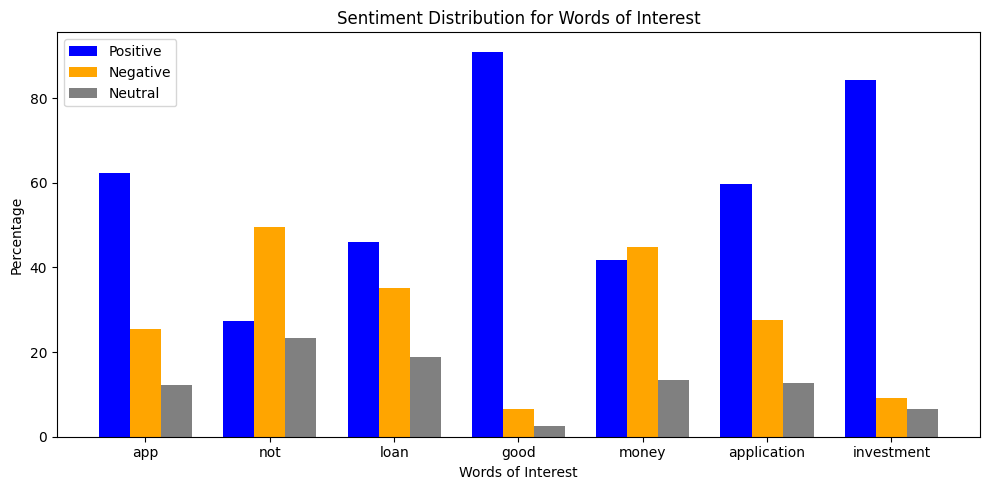

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data from a CSV file
# data = pd.read_csv("your_data.csv")  # Replace with your CSV file name

# Assuming the reviews are in a column named 'content'
reviews = df['content'].tolist()

# Preprocessing function
def preprocess_review(review):
    review = re.sub(r"http\S+", "", review)
    review = re.sub(r"@\w+", "", review)
    review = re.sub(r"[^a-zA-Z\s]", "", review)
    review = review.lower()
    return review

# Apply preprocessing to each review
cleaned_reviews = [preprocess_review(review) for review in reviews]

# Tokenization using NLTK
tokenized_reviews = [nltk.word_tokenize(review) for review in cleaned_reviews]

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Words of interest for sentiment analysis
words_of_interest = ["app", "not","loan","good","money","application","investment"]

# Dictionary to store sentiment scores for each word
sentiments = {word: {'positive': 0, 'negative': 0, 'neutral': 0} for word in words_of_interest}

# Perform sentiment analysis for each word of interest
for word in words_of_interest:
    for review in tokenized_reviews:
        if word in review:
            sentiment = sia.polarity_scores(' '.join(review))
            if sentiment['compound'] > 0.2:
                sentiments[word]['positive'] += 1
            elif sentiment['compound'] < -0.2:
                sentiments[word]['negative'] += 1
            else:
                sentiments[word]['neutral'] += 1

# Create a DataFrame to store sentiment percentages and counts
data = []
for word in words_of_interest:
    total_positive = sentiments[word]['positive']
    total_negative = sentiments[word]['negative']
    total_neutral = sentiments[word]['neutral']
    total_reviews = total_positive + total_negative + total_neutral

    positive_percentage = (total_positive / total_reviews) * 100
    negative_percentage = (total_negative / total_reviews) * 100
    neutral_percentage = (total_neutral / total_reviews) * 100

    data.append([word, total_positive, total_negative, total_neutral, positive_percentage, negative_percentage, neutral_percentage])

columns = ['Word', 'Positive_Count', 'Negative_Count', 'Neutral_Count', 'Positive_Percentage', 'Negative_Percentage', 'Neutral_Percentage']
df_sentiments = pd.DataFrame(data, columns=columns)

# Print sentiment analysis results in tabular form
print(df_sentiments)

# Plot sentiment distribution for each word of interest
plt.figure(figsize=(10, 5))

x_values = df_sentiments['Word']
bar_width = 0.25
index = range(len(x_values))

colors = {'Positive': 'blue', 'Negative': 'orange', 'Neutral': 'gray'}

for sentiment_type in ['Positive', 'Negative', 'Neutral']:
    y_values = df_sentiments[sentiment_type + '_Percentage']
    plt.bar(index, y_values, bar_width, color=colors[sentiment_type], label=sentiment_type)
    index = [x + bar_width for x in index]

plt.xlabel("Words of Interest")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution for Words of Interest")
plt.xticks([r + bar_width for r in range(len(x_values))], x_values)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

          Word  Positive_Count  Negative_Count  Neutral_Count  \
0          app            1700             695            336   
1          not             422             767            360   
2         loan             555             424            227   
3         good            1074              76             30   
4        money             299             321             96   
5  application             387             179             83   
6   investment             502              55             39   

   Positive_Percentage  Negative_Percentage  Neutral_Percentage  
0            62.248261            25.448554           12.303186  
1            27.243383            49.515817           23.240801  
2            46.019900            35.157546           18.822554  
3            91.016949             6.440678            2.542373  
4            41.759777            44.832402           13.407821  
5            59.630200            27.580894           12.788906  
6            84.2

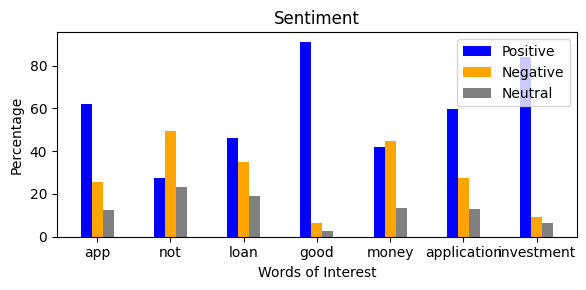

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming the reviews are in a column named 'content'
reviews = df['content'].tolist()

# Preprocessing function
def preprocess_review(review):
    review = re.sub(r"http\S+", "", review)
    review = re.sub(r"@\w+", "", review)
    review = re.sub(r"[^a-zA-Z\s]", "", review)
    review = review.lower()
    return review

# Apply preprocessing to each review
cleaned_reviews = [preprocess_review(review) for review in reviews]

# Tokenization using NLTK
tokenized_reviews = [nltk.word_tokenize(review) for review in cleaned_reviews]

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Words of interest for sentiment analysis
words_of_interest = ["app", "not","loan","good","money","application","investment"]

# Dictionary to store sentiment scores for each word
sentiments = {word: {'positive': 0, 'negative': 0, 'neutral': 0} for word in words_of_interest}

# Perform sentiment analysis for each word of interest
for word in words_of_interest:
    for review in tokenized_reviews:
        if word in review:
            sentiment = sia.polarity_scores(' '.join(review))
            if sentiment['compound'] > 0.2:
                sentiments[word]['positive'] += 1
            elif sentiment['compound'] < -0.2:
                sentiments[word]['negative'] += 1
            else:
                sentiments[word]['neutral'] += 1

# Create a DataFrame to store sentiment percentages and counts for 5 words of interest
data = []
for word in words_of_interest:
    total_positive = sentiments[word]['positive']
    total_negative = sentiments[word]['negative']
    total_neutral = sentiments[word]['neutral']
    total_reviews = total_positive + total_negative + total_neutral

    positive_percentage = (total_positive / total_reviews) * 100
    negative_percentage = (total_negative / total_reviews) * 100
    neutral_percentage = (total_neutral / total_reviews) * 100

    data.append([word, total_positive, total_negative, total_neutral, positive_percentage, negative_percentage, neutral_percentage])

columns = ['Word', 'Positive_Count', 'Negative_Count', 'Neutral_Count', 'Positive_Percentage', 'Negative_Percentage', 'Neutral_Percentage']
df_sentiments = pd.DataFrame(data, columns=columns)

# Print sentiment analysis results in tabular form for 5 words of interest
print(df_sentiments)

# Plot sentiment distribution for each word of interest
plt.figure(figsize=(6, 3))

x_values = df_sentiments['Word']
bar_width = 0.15
index = range(len(x_values))

colors = {'Positive': 'blue', 'Negative': 'orange', 'Neutral': 'gray'}

for sentiment_type in ['Positive', 'Negative', 'Neutral']:
    y_values = df_sentiments[sentiment_type + '_Percentage']
    plt.bar(index, y_values, bar_width, color=colors[sentiment_type], label=sentiment_type)
    index = [x + bar_width for x in index]

plt.xlabel("Words of Interest")
plt.ylabel("Percentage")
plt.title("Sentiment")
plt.xticks([r + bar_width for r in range(len(x_values))], x_values)
plt.legend()
plt.tight_layout()
plt.show()


# Determint the context of sentence using VADER and TextBlob

In [ ]:
df.head(5)

,userName,content,score,at,thumbsUpCount,Label
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1
3,Nitish Kumar,highly recommended secure convenient platform ...,5,2023-06-15 08:56:49,0,1
4,Ajmeri Khan,great platform investment decent returns,5,2023-06-14 15:28:44,0,1


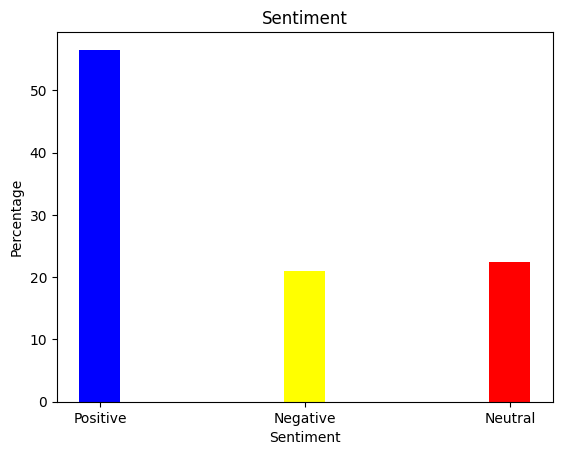

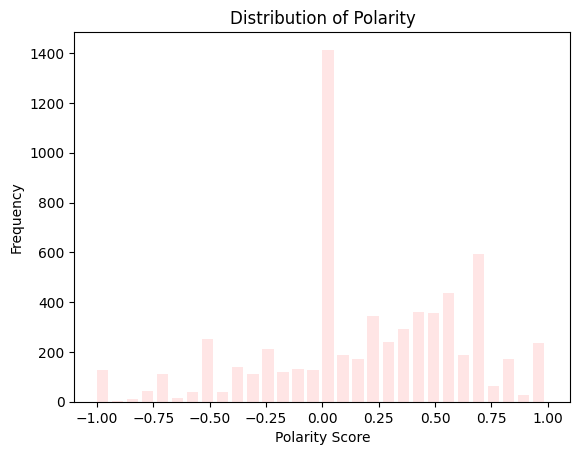

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob

# Perform sentiment analysis and categorize reviews into polarities
positive_reviews = 0
negative_reviews = 0
neutral_reviews = 0
polarity_scores = []

for review in cleaned_reviews:
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    polarity_scores.append(polarity)

    if polarity >= 0.05:
        positive_reviews += 1
    elif polarity <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

# Calculate percentages
total_reviews = len(cleaned_reviews)
positive_percentage = (positive_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100

# Create a bar chart to visualize the sentiment percentages with space between bars
labels = ['Positive', 'Negative', 'Neutral']
percentages = [positive_percentage, negative_percentage, neutral_percentage]
bar_width = 0.2  # Adjust the width to create space between bars

plt.bar(labels, percentages, width= bar_width, color=['blue', 'yellow', 'red'])
plt.title("Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.show()

# Create a histogram for the polarity scores
plt.hist(polarity_scores, bins=30, color='red', alpha=0.1, width = 0.05)
plt.title("Distribution of Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()


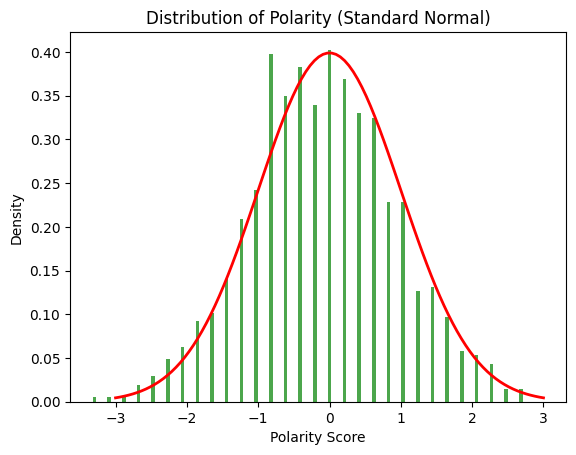

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data with a standard normal distribution
mean = 0  # Mean of the normal distribution (centered at 0)
std_dev = 1  # Standard deviation of the normal distribution
sample_size = 1000  # Number of samples
polarity_scores = np.random.normal(mean, std_dev, sample_size)

# Create a histogram
plt.hist(polarity_scores, bins=30, density=True, color='green', alpha=0.7, width = 0.05)

# Plot the standard normal distribution curve for comparison
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', lw=2)

plt.title("Distribution of Polarity (Standard Normal)")
plt.xlabel("Polarity Score")
plt.ylabel("Density")
plt.show()


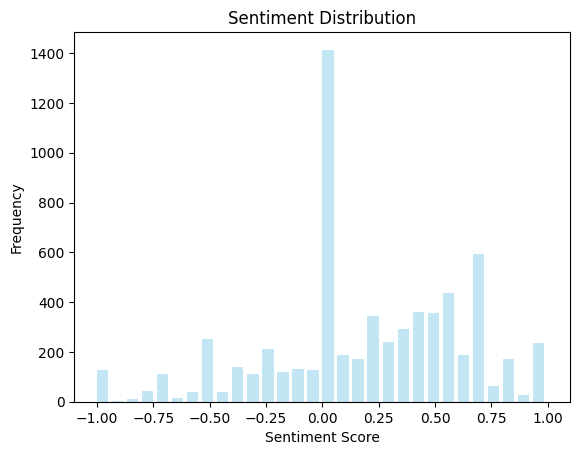

In [ ]:
from textblob import TextBlob

# Assuming you have a DataFrame 'df' with a 'text' column containing text entries
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Calculate summary statistics
mean_sentiment = df['sentiment'].mean()
median_sentiment = df['sentiment'].median()
std_dev_sentiment = df['sentiment'].std()
import matplotlib.pyplot as plt

# Create a histogram of sentiment scores
plt.hist(df['sentiment'], bins=30, color='skyblue', alpha=0.5, width=0.05)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


Sentiment analysis for 'app':
Positive: 62.25%
Negative: 25.45%
Neutral: 12.30%

Sentiment analysis for 'not':
Positive: 27.24%
Negative: 49.52%
Neutral: 23.24%

Sentiment analysis for 'loan':
Positive: 46.02%
Negative: 35.16%
Neutral: 18.82%

Sentiment analysis for 'good':
Positive: 91.02%
Negative: 6.44%
Neutral: 2.54%

Sentiment analysis for 'money':
Positive: 41.76%
Negative: 44.83%
Neutral: 13.41%

Sentiment analysis for 'application':
Positive: 59.63%
Negative: 27.58%
Neutral: 12.79%

Sentiment analysis for 'investment':
Positive: 84.23%
Negative: 9.23%
Neutral: 6.54%



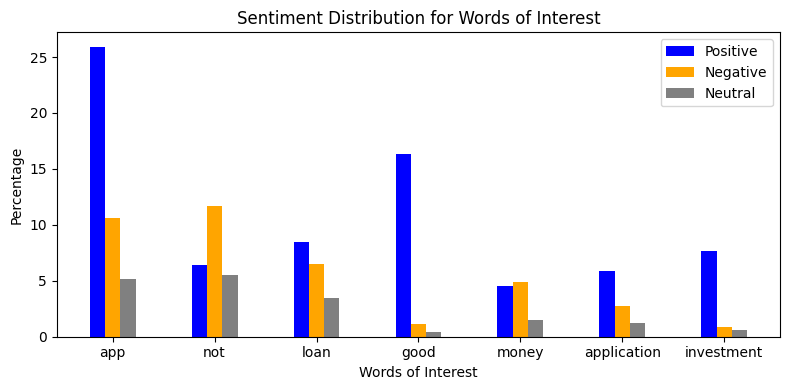

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Dictionary to store sentiment scores for each word
sentiments = {word: {'positive': [], 'negative': [], 'neutral': []} for word in words_of_interest}

# Perform sentiment analysis for each word of interest
for word in words_of_interest:
    for review in tokenized_reviews:
        if word in review:
            sentiment = sia.polarity_scores(' '.join(review))
            if sentiment['compound'] > 0.2:
                sentiments[word]['positive'].append(sentiment['compound'])
            elif sentiment['compound'] < -0.2:
                sentiments[word]['negative'].append(sentiment['compound'])
            else:
                sentiments[word]['neutral'].append(sentiment['compound'])

# Print sentiment percentages for each word of interest
for word in words_of_interest:
    total_positive = len(sentiments[word]['positive'])
    total_negative = len(sentiments[word]['negative'])
    total_neutral = len(sentiments[word]['neutral'])
    total_reviews = total_positive + total_negative + total_neutral

    positive_percentage = (total_positive / total_reviews) * 100
    negative_percentage = (total_negative / total_reviews) * 100
    neutral_percentage = (total_neutral / total_reviews) * 100

    print(f"Sentiment analysis for '{word}':")
    print(f"Positive: {positive_percentage:.2f}%")
    print(f"Negative: {negative_percentage:.2f}%")
    print(f"Neutral: {neutral_percentage:.2f}%")
    print()


# Plot sentiment distribution for each word of interest
plt.figure(figsize=(8, 4))

x_values = words_of_interest
bar_width = 0.15
index = range(len(words_of_interest))

colors = {'positive': 'blue', 'negative': 'orange', 'neutral': 'gray'}

for i, sentiment_type in enumerate(['positive', 'negative', 'neutral']):
    y_values = []
    for word in words_of_interest:
        total_reviews = len(sentiments[word][sentiment_type])
        y_value = (total_reviews / len(tokenized_reviews)) * 100
        y_values.append(y_value)

    plt.bar(index, y_values, bar_width, color=colors[sentiment_type], label=sentiment_type.capitalize())
    index = [x + bar_width for x in index]

plt.xlabel("Words of Interest")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution for Words of Interest")
plt.xticks([r + bar_width for r in range(len(words_of_interest))], words_of_interest)
plt.legend()
plt.tight_layout()
plt.show()


          Word   Positive   Negative    Neutral
0          app  62.248261  25.448554  12.303186
1          not  27.243383  49.515817  23.240801
2         loan  46.019900  35.157546  18.822554
3         good  91.016949   6.440678   2.542373
4        money  41.759777  44.832402  13.407821
5  application  59.630200  27.580894  12.788906
6   investment  84.228188   9.228188   6.543624


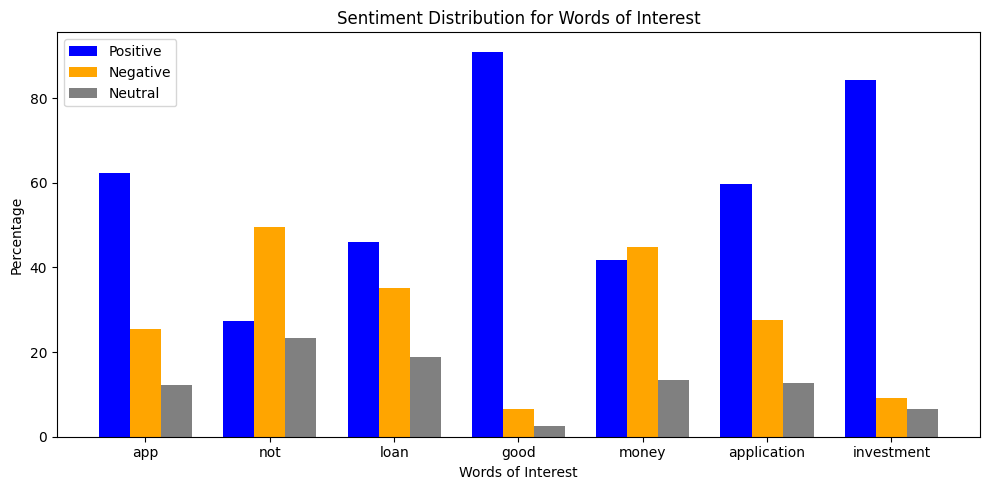

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data from a CSV file
# data = pd.read_csv("your_data.csv")  # Replace with your CSV file name

# Assuming the reviews are in a column named 'content'
reviews = df['content'].tolist()

# Preprocessing function
def preprocess_review(review):
    review = re.sub(r"http\S+", "", review)
    review = re.sub(r"@\w+", "", review)
    review = re.sub(r"[^a-zA-Z\s]", "", review)
    review = review.lower()
    return review

# Apply preprocessing to each review
cleaned_reviews = [preprocess_review(review) for review in reviews]

# Tokenization using NLTK
tokenized_reviews = [nltk.word_tokenize(review) for review in cleaned_reviews]

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Words of interest for sentiment analysis
words_of_interest = ["app", "not","loan","good","money","application","investment"]

# Dictionary to store sentiment scores for each word
sentiments = {word: {'positive': [], 'negative': [], 'neutral': []} for word in words_of_interest}

# Perform sentiment analysis for each word of interest
for word in words_of_interest:
    for review in tokenized_reviews:
        if word in review:
            sentiment = sia.polarity_scores(' '.join(review))
            if sentiment['compound'] > 0.2:
                sentiments[word]['positive'].append(sentiment['compound'])
            elif sentiment['compound'] < -0.2:
                sentiments[word]['negative'].append(sentiment['compound'])
            else:
                sentiments[word]['neutral'].append(sentiment['compound'])

# Create a DataFrame to store sentiment percentages
data = []
for word in words_of_interest:
    total_positive = len(sentiments[word]['positive'])
    total_negative = len(sentiments[word]['negative'])
    total_neutral = len(sentiments[word]['neutral'])
    total_reviews = total_positive + total_negative + total_neutral

    positive_percentage = (total_positive / total_reviews) * 100
    negative_percentage = (total_negative / total_reviews) * 100
    neutral_percentage = (total_neutral / total_reviews) * 100

    data.append([word, positive_percentage, negative_percentage, neutral_percentage])

columns = ['Word', 'Positive', 'Negative', 'Neutral']
df_sentiments = pd.DataFrame(data, columns=columns)

# Print sentiment analysis results in tabular form
print(df_sentiments)

# Plot sentiment distribution for each word of interest
plt.figure(figsize=(10, 5))

x_values = df_sentiments['Word']
bar_width = 0.25
index = range(len(x_values))

colors = {'Positive': 'blue', 'Negative': 'orange', 'Neutral': 'gray'}

for sentiment_type in ['Positive', 'Negative', 'Neutral']:
    y_values = df_sentiments[sentiment_type]
    plt.bar(index, y_values, bar_width, color=colors[sentiment_type], label=sentiment_type)
    index = [x + bar_width for x in index]

plt.xlabel("Words of Interest")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution for Words of Interest")
plt.xticks([r + bar_width for r in range(len(x_values))], x_values)
plt.legend()
plt.tight_layout()
plt.show()


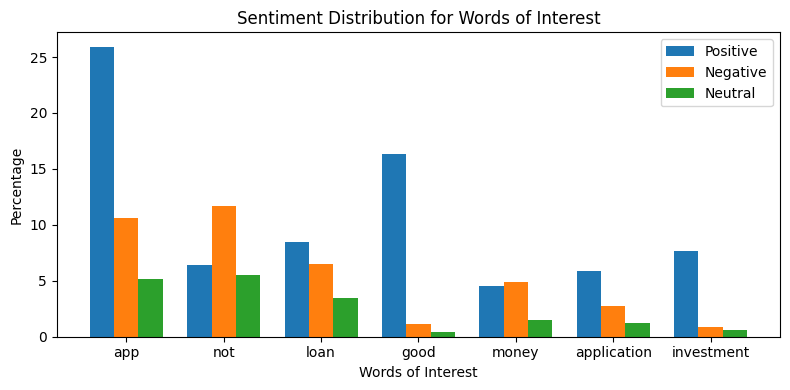

In [ ]:

import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Words of interest for sentiment analysis
words_of_interest = ["app", "not","loan","good","money","application","investment"]

# Dictionary to store sentiment scores for each word
sentiments = {word: {'positive': [], 'negative': [], 'neutral': []} for word in words_of_interest}

# Perform sentiment analysis for each word of interest
for word in words_of_interest:
    for review in tokenized_reviews:
        if word in review:
            sentiment = sia.polarity_scores(' '.join(review))
            if sentiment['compound'] > 0.2:
                sentiments[word]['positive'].append(sentiment['compound'])
            elif sentiment['compound'] < -0.2:
                sentiments[word]['negative'].append(sentiment['compound'])
            else:
                sentiments[word]['neutral'].append(sentiment['compound'])

# Plot sentiment distribution for each word of interest
plt.figure(figsize=(8, 4))

x_values = words_of_interest
bar_width = 0.25
index = range(len(words_of_interest))

for i, sentiment_type in enumerate(['positive', 'negative', 'neutral']):
    y_values = []
    for word in words_of_interest:
        total_reviews = len(sentiments[word][sentiment_type])
        y_value = (total_reviews / len(tokenized_reviews)) * 100
        y_values.append(y_value)

    plt.bar(index, y_values, bar_width, label=sentiment_type.capitalize())
    index = [x + bar_width for x in index]

plt.xlabel("Words of Interest")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution for Words of Interest")
plt.xticks([r + bar_width for r in range(len(words_of_interest))], words_of_interest)
plt.legend()
plt.tight_layout()
plt.show()


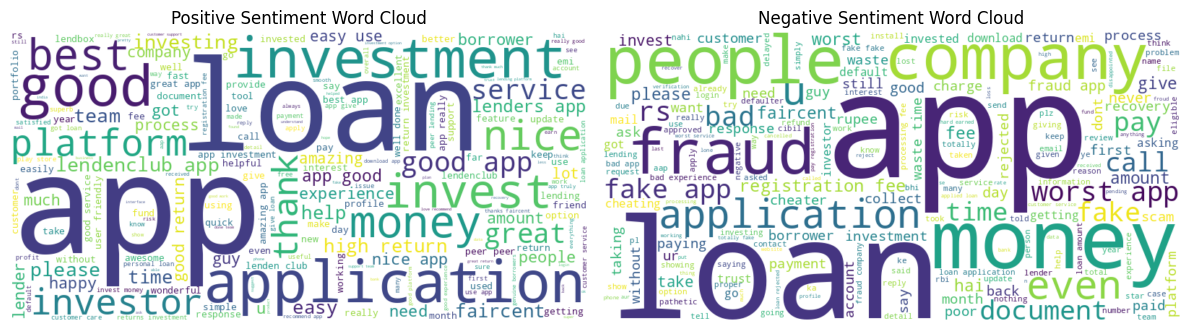

In [ ]:
# %%time
from wordcloud import WordCloud

# Filter words based on positive sentiment
positive_words = [word for review in tokenized_reviews if sia.polarity_scores(' '.join(review))['compound'] > 0.2 for word in review]

# Filter words based on negative sentiment
negative_words = [word for review in tokenized_reviews if sia.polarity_scores(' '.join(review))['compound'] < -0.2 for word in review]

# Join the words into single strings for each sentiment
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

# Generate word clouds for positive and negative sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df.head(4)

,userName,content,score,at,thumbsUpCount,Label,sentiment
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1,0.600000
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1,0.716667
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1,0.400000
3,Nitish Kumar,highly recommended secure convenient platform ...,5,2023-06-15 08:56:49,0,1,0.280000


## Bag of Words (BOW)  Feature Extraction:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus (replace with your actual text data)


# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the corpus to generate the Bag of Words matrix
X = vectorizer.fit_transform(df['content'])

# Get the vocabulary (unique words)
vocabulary = vectorizer.get_feature_names_out()

# Convert the Bag of Words matrix to an array
X_array = X.toarray()

# Create a DataFrame for visualization (requires pandas)
import pandas as pd
df_bow = pd.DataFrame(X_array, columns=vocabulary)

# Print the Bag of Words DataFrame
print(df_bow)


      aa  aabhi  aaccount  aadhaar  aadhar  aadmi  aage  aaj  aakar  aake  \
0      0      0         0        0       0      0     0    0      0     0   
1      0      0         0        0       0      0     0    0      0     0   
2      0      0         0        0       0      0     0    0      0     0   
3      0      0         0        0       0      0     0    0      0     0   
4      0      0         0        0       0      0     0    0      0     0   
...   ..    ...       ...      ...     ...    ...   ...  ...    ...   ...   
6556   0      0         0        0       0      0     0    0      0     0   
6557   0      0         0        0       0      0     0    0      0     0   
6558   0      0         0        0       0      0     0    0      0     0   
6559   0      0         0        0       0      0     0    0      0     0   
6560   0      0         0        0       0      0     0    0      0     0   

      ...  हमन  हमस  இந  எம  கர  கள  கவ  டர  டஸ  பயன  
0     ...    0    0 

In [ ]:
X[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data = pd.DataFrame(X.todense())
data

,0,1,2,3,4,5,6,7,8,9,...,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.size/1e6

0.045927

In [ ]:
np.count_nonzero(df)  #count non zero element

37369

In [ ]:
100*np.count_nonzero(df)/df.size

81.36608095455833

In [ ]:
vectorizer.get_feature_names_out()[:50]#this are the vacoblaray word

array(['aa', 'aabhi', 'aaccount', 'aadhaar', 'aadhar', 'aadmi', 'aage',
       'aaj', 'aakar', 'aake', 'aal', 'aam', 'aana', 'aani', 'aao', 'aap',
       'aapaka', 'aapka', 'aapke', 'aapki', 'aapko', 'aaply', 'aaplya',
       'aaproal', 'aaps', 'aapse', 'aasan', 'aawesome', 'aaya', 'aaye',
       'aayega', 'ab', 'abaut', 'abe', 'abhe', 'abhi', 'abhishek',
       'ability', 'able', 'abscond', 'absence', 'absolute', 'absolutely',
       'abt', 'abusing', 'abusive', 'abyay', 'ac', 'accept', 'acceptable'],
      dtype=object)

In [ ]:
df.shape


(6561, 7)

In [ ]:
df.head(3)

,userName,content,score,at,thumbsUpCount,Label,sentiment
0,Santosh Tamhanekar,nice,4,2023-06-16 16:07:20,0,1,0.600000
1,Rizwan saifee,best app investment get easy returns,5,2023-06-16 11:24:23,0,1,0.716667
2,Rahul Sawant,application process smooth,5,2023-06-16 09:35:16,0,1,0.400000


# Model_Building

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined 'vectorizer' and 'df'


X_train, X_test, y_train, y_test = train_test_split(
    vectorizer.transform(df['content']),  # Replace 'content' with the actual column containing text data
    df['Label'],
    test_size=0.25,
    stratify=df['Label'],
    random_state=42
)


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file

X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Target variable


In [ ]:
# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
# Create a new DataFrame with the resampled data
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

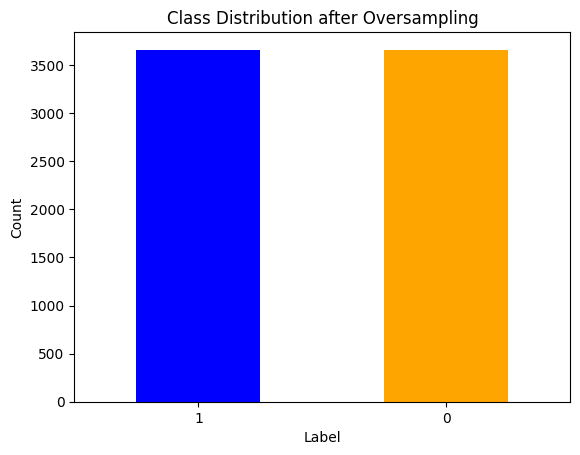

In [ ]:
# Visualize the class distribution after oversampling
class_counts = resampled_data['Label'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution after Oversampling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file


# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(max_features=5000)  # You can adjust the number of features as needed

# Fit and transform the training data
X_train = vectorizer.fit_transform(df['content'])  # Replace 'text_column' with the actual text column name
y_train = df['Label']  # Replace 'label_column' with the actual label column name

# Transform the test data
X_test = vectorizer.transform(df['content'])
y_test = df['Label']

# Initialize and train the models
logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict labels on the test set
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Evaluate the models' performance
logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)


Logistic Regression Accuracy: 0.9739368998628258
Random Forest Accuracy: 0.9919219631153787
XGBoost Accuracy: 0.950922115531169
Decision Tree Accuracy: 0.9919219631153787
SVM Accuracy: 0.9724127419600671
KNN Accuracy: 0.9125133363816491


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with 'content' and 'Label' columns

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 5000  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['content'])

# Convert text data to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_data['content'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['content'])

# Pad sequences to have the same length
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Define the LSTM model with dropout and Adam optimizer
embedding_dim = 100  # You can adjust this based on your dataset
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=100, dropout=0.1, recurrent_dropout=0.1),  # Adjust dropout rates as needed
    Dense(units=1, activation='sigmoid')
])

# Compile the model with the Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # You can adjust the learning rate
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
y_train = train_data['Label']
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_test = test_data['Label']
y_pred_prob = model.predict(X_test_padded)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate accuracy
lstm_accuracy = accuracy_score(y_test, y_pred)
print("LSTM Accuracy:", lstm_accuracy)


**Bert**

In [ ]:
# Install transformers library
!pip install transformers

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Assuming 'content' is the column containing text and 'Label' is the label column
train_texts = train_data['content'].tolist()
train_labels = train_data['Label'].tolist()

test_texts = test_data['content'].tolist()
test_labels = test_data['Label'].tolist()

# Tokenize and convert to PyTorch tensors using DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

# Create DataLoader
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

# Load pre-trained DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
model.train()

for epoch in range(3):
    print(f'Epoch {epoch + 1}/3:')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())

# Calculate accuracy
accuracy = accuracy_score(test_labels.tolist(), predictions)

# Print accuracy
print("DistilBERT Accuracy:", accuracy)

NameError: ignored

In [ ]:
# Load the dataset
dataset = pd.read_csv('merged_dataset.csv')

# Assuming 'content' is the column containing text and 'userName' is the label column
texts = dataset['content'].tolist()
labels = [1 if "positive" in sentiment.lower() else 0 for sentiment in dataset['userName']]

# Split data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize and convert to PyTorch tensors
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

# Create DataLoader
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
model.train()

for epoch in range(1):
    print(f'Epoch {epoch + 1}/1:')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


# Evaluate the model
model.eval()
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())

# Calculate accuracy
accuracy = accuracy_score(test_labels.tolist(), predictions)

# Print accuracy in the specified format
print(f'BERT Accuracy: {accuracy}')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1:


In [ ]:
# !pip install xgboost

In [ ]:
# Print classification report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))

print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_pred))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))

print("Classification Report for SVM:")
print(classification_report(y_test, svm_pred))

print("Classification Report for KNN:")
print(classification_report(y_test, knn_pred))


Classification Report for Logistic Regression:


ValueError: ignored

# TF-IDF (Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (replace with your actual text data)

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus to generate the TF-IDF matrix
X = tfidf_vectorizer.fit_transform(df['content'])

# Get the vocabulary (unique words)
vocabulary = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to an array
X_array = X.toarray()

# Create a DataFrame for visualization (requires pandas)
import pandas as pd
df_tfidf = pd.DataFrame(X_array, columns=vocabulary)

# Print the TF-IDF DataFrame
print(df_tfidf)


In [ ]:
X[0].todense()

In [ ]:
data = pd.DataFrame(X.todense())
data

# Model_Building

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined 'vectorizer' and 'df'



X_train, X_test, y_train, y_test = train_test_split(
    tfidf_vectorizer.fit_transform(df['content']),  # Replace 'content' with the actual column containing text data
    df['Label'],
    test_size=0.25,
    stratify=df['Label'],
    random_state=42
)


In [ ]:
label_counts = df['Label'].value_counts()
print(label_counts)


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file

X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Target variable

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Visualize the class distribution after oversampling
class_counts = resampled_data['Label'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution after Oversampling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file
# data = pd.read_csv('your_dataset.csv')

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed

# Fit and transform the training data
X_train = vectorizer.fit_transform(df['content'])  # Replace 'content' with the actual text column name
y_train = df['Label']  # Replace 'Label' with the actual label column name

# Transform the test data
X_test = vectorizer.transform(df['content'])
y_test = df['Label']

# Initialize and train the models
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict labels on the test set
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Evaluate the models' performance
logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)


In [ ]:
# Print classification report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))

print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_pred))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))

print("Classification Report for SVM:")
print(classification_report(y_test, svm_pred))

print("Classification Report for KNN:")
print(classification_report(y_test, knn_pred))


# Hashing Vector Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# Sample corpus (replace with your actual text data)

# Create a HashingVectorizer instance
hash_vectorizer = HashingVectorizer(n_features=1000)  # You can adjust n_features as needed

# Transform the corpus to generate the Hashing vector
X = hash_vectorizer.transform(df['content'])

# Convert the Hashing vector to an array
X_array = X.toarray()

# Create a DataFrame for visualization (requires pandas)
import pandas as pd
df_hash = pd.DataFrame(X_array)

# Print the Hashing Vector DataFrame
print(df_hash)


# Model_Building

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined 'vectorizer' and 'df'



X_train, X_test, y_train, y_test = train_test_split(
    hash_vectorizer.transform(df['content']),  # Replace 'content' with the actual column containing text data
    df['Label'],
    test_size=0.25,
    stratify=df['Label'],
    random_state=42
)


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file

X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Target variable

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Visualize the class distribution after oversampling
class_counts = resampled_data['Label'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution after Oversampling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file
# data = pd.read_csv('your_dataset.csv')

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create a HashingVectorizer to convert text into a hash matrix
vectorizer = HashingVectorizer(n_features=5000)  # You can adjust the number of features as needed

# Transform the training data
X_train = vectorizer.transform(df['content'])  # Replace 'content' with the actual text column name
y_train = df['Label']  # Replace 'Label' with the actual label column name

# Transform the test data
X_test = vectorizer.transform(df['content'])
y_test = df['Label']

# Initialize and train the models
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict labels on the test set
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Evaluate the models' performance
logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)


In [ ]:
# Print classification report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))

print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_pred))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))

print("Classification Report for SVM:")
print(classification_report(y_test, svm_pred))

print("Classification Report for KNN:")
print(classification_report(y_test, knn_pred))


# Hyper Parameter Tunning

# Randomized search

In [ ]:
df.head()

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Fit and transform the training data
X_train = vectorizer.fit_transform(df['content'])  # Replace 'text_column' with the actual text column name
y_train = df['Label']  # Replace 'label_column' with the actual label column name

# Transform the test data
X_test = vectorizer.transform(df['content'])
y_test = df['Label']

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)




rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Randomized Search Cv

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop=500, num = 10)]

max_depth = [int(x) for x in np.linspace(50, 500,10)]

random_grid = {'n_estimators': n_estimators,

               'max_depth': max_depth,
}
print(random_grid)

In [ ]:
X_train.shape

In [ ]:
%%time
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

In [ ]:
rf_randomcv.best_params_

In [ ]:
rf_randomcv

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

# GridSearch CV:


In [ ]:
rf_randomcv.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
#     'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
      'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, rf_randomcv.best_params_['n_estimators'] - 50,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 50, rf_randomcv.best_params_['n_estimators'] + 100]

}

print(param_grid)

In [ ]:
#### Fit the grid_search to the data

rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file
# data = pd.read_csv('your_dataset.csv')

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# List of vectorizers and their names
vectorizers = [
    ("BoW", CountVectorizer(max_features=5000)),
    ("TF-IDF", TfidfVectorizer(max_features=5000)),
    ("Hashing", HashingVectorizer(n_features=5000))
]

# List of machine learning models and their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier())
]

# Iterate through vectorizers and models
for v_name, vectorizer in vectorizers:
    for m_name, model in models:
        # Vectorize the training and testing data
        X_train = vectorizer.fit_transform(df['content'])
        X_test = vectorizer.transform(df['content'])
        y_train = df['Label']
        y_test = df['Label']

        # Train the model
        model.fit(X_train, y_train)

        # Predict labels on the test set
        y_pred = model.predict(X_test)

        # Calculate and store classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        results[f"{v_name} - {m_name}"] = report

# Display per-class scores for each model
for key, report in results.items():
    print(key)
    print(pd.DataFrame(report).transpose())
    print("\n" + "="*40 + "\n")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file
# data = pd.read_csv('your_dataset.csv')

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# List of vectorizers and their names
vectorizers = [
    ("BoW", CountVectorizer(max_features=5000)),
    ("TF-IDF", TfidfVectorizer(max_features=5000)),
    ("Hashing", HashingVectorizer(n_features=5000))
]

# List of machine learning models and their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier())
]

# Initialize lists to store F1 scores for each model
f1_scores = {v_name: [] for v_name, _ in vectorizers}

# Iterate through vectorizers and models
for v_name, vectorizer in vectorizers:
    for m_name, model in models:
        # Vectorize the training and testing data
        X_train = vectorizer.fit_transform(df['content'])
        X_test = vectorizer.transform(df['content'])
        y_train = df['Label']
        y_test = df['Label']

        # Train the model
        model.fit(X_train, y_train)

        # Predict labels on the test set
        y_pred = model.predict(X_test)

        # Calculate F1 score and store it
        f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score
        f1_scores[v_name].append(f1)

# Create a bar plot to visualize F1 scores
plt.figure(figsize=(12, 6))
for v_name, f1_list in f1_scores.items():
    plt.bar([f"{v_name} - {m_name}" for m_name, _ in models], f1_list, label=v_name)

plt.xlabel('Models')
plt.ylabel('Weighted F1 Score')
plt.title('Comparison of ML Models with Different Features')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for adding gaps between bars
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file
# data = pd.read_csv('your_dataset.csv')

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# List of vectorizers and their names
vectorizers = [
    ("BoW", CountVectorizer(max_features=5000)),
    ("TF-IDF", TfidfVectorizer(max_features=5000)),
    ("Hashing", HashingVectorizer(n_features=5000))
]

# List of machine learning models and their names
models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ("RF", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier())
]

# Initialize lists to store F1 scores for each model
f1_scores = {v_name: [] for v_name, _ in vectorizers}

# Initialize the positions for each group of bars
bar_width = 0.2  # Width of each bar
index = np.arange(len(models))  # Index for the models

# Iterate through vectorizers and models
for i, (v_name, vectorizer) in enumerate(vectorizers):
    for j, (m_name, model) in enumerate(models):
        # Vectorize the training and testing data
        X_train = vectorizer.fit_transform(df['content'])
        X_test = vectorizer.transform(df['content'])
        y_train = df['Label']
        y_test = df['Label']

        # Train the model
        model.fit(X_train, y_train)

        # Predict labels on the test set
        y_pred = model.predict(X_test)

        # Calculate F1 score and store it
        f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score
        f1_scores[v_name].append(f1)

    # Create a bar plot to visualize F1 scores for this vectorizer
    plt.bar(index + i * bar_width, f1_scores[v_name], bar_width, label=v_name)

# Set x-axis labels and ticks
plt.xlabel('Models')
plt.ylabel('Weighted F1 Score')
plt.title('Comparison of ML Models with Different Features')
plt.xticks(index + 1.0 * bar_width, [m_name for m_name, _ in models])
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# # Load your CSV datasets
# dataset1 = pd.read_csv('dataset1.csv')
# dataset2 = pd.read_csv('dataset2.csv')


# # Merge datasets using the 'concat' function
# merged_dataset = pd.concat([dataset1, dataset2], ignore_index=True)

# # Save the merged dataset to a new CSV file
# merged_dataset.to_csv('merged_dataset.csv', index=False)

# # Display the first few rows of the merged dataset
# print(merged_dataset.head())

In [ ]:
merged_dataset = pd.read_csv('merged_dataset _1.csv')
print(merged_dataset.head())

In [ ]:
merged_dataset.shape

In [ ]:
merged_dataset.tail()

In [ ]:
# Define the threshold for categorizing scores
thresholds = {
    'negative': 2,
    'neutral': 3,
    'positive': 5
}

# Create a single bar chart for all 'type' values
plt.figure(figsize=(12, 6))
colors = {'negative': 'red', 'neutral': 'orange', 'positive': 'blue'}

for sentiment in ['negative', 'neutral', 'positive']:
    sentiment_counts = []
    for type_value in range(1, 6):
        filtered_df = merged_dataset[(merged_dataset['type'] == type_value) & (merged_dataset['score'] <= thresholds[sentiment])]
        sentiment_counts.append(len(filtered_df))

    # Calculate x-positions for the bars
    x_positions = [x + (list(colors.keys()).index(sentiment) - 1) * 0.2 for x in range(1, 6)]

    plt.bar(x_positions, sentiment_counts, width=0.2, label=sentiment, color=colors[sentiment])

companies = ['faircent' , 'india moneymart','LenDenClub','Lendbox','i2i funding']
plt.title('Sentiment Distribution for all 5 apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks([x for x in range(1, 6)], companies)
plt.legend()
plt.show()